# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.072693e+01     7.341597e+00
 * time: 0.0015459060668945312
     1     2.781566e+01     4.873776e+00
 * time: 0.005848884582519531
     2     1.962158e+01     5.130021e+00
 * time: 0.010479927062988281
     3     1.331499e+01     3.480659e+00
 * time: 0.014974117279052734
     4     1.123080e+01     1.290844e+00
 * time: 0.019865036010742188
     5     1.027378e+01     1.883343e+00
 * time: 0.023684978485107422
     6     9.841047e+00     1.399138e+00
 * time: 0.02758502960205078
     7     9.482209e+00     9.848925e-01
 * time: 0.03166389465332031
     8     9.035844e+00     9.585934e-01
 * time: 0.07927393913269043
     9     8.666351e+00     8.335037e-01
 * time: 0.08304810523986816
    10     8.396135e+00     5.834981e-01
 * time: 0.08663797378540039
    11     8.250939e+00     5.914260e-01
 * time: 0.09052491188049316
    12     8.139444e+00     5.792031e-01
 * time: 0.09411406517028809
    13     8.113632e+00     8.269108e-01
 

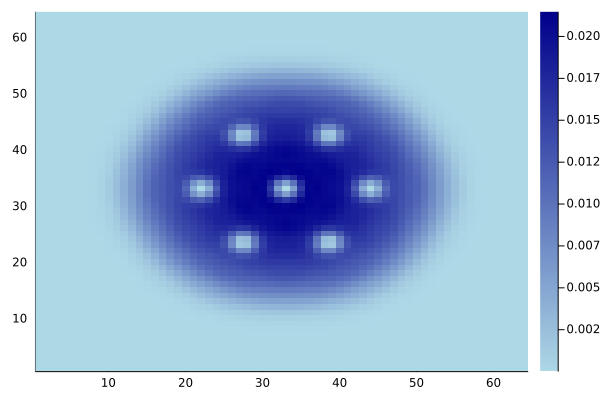

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)